In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
import yfinance as yf

# create a ticker object for Tesla stock (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# extract TSLA stock data
tesla_ticker = tesla_ticker.history(period="max")

# reset the index
tesla_ticker_reset = tesla_ticker.reset_index()

# display the first few rows of TSLA stock data
tesla_ticker_reset.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Extract stock data for the maximum available period
tesla_data = tesla_ticker.history(period="max")

# Display the first few rows of the DataFrame to verify the data
tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
# Reset the index to move the date into a column
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame to verify the data
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
# URL of webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# requests to get webpage content
response = requests.get(url)

url_data = response.text

# print the first 500 characters of the HTML data to verify
print(url_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


In [8]:
from bs4 import BeautifulSoup

# parse url data using BeautifulSoup and parser
soup = BeautifulSoup(response.content,'html5lib')

# print to verify
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


In [9]:
import pandas as pd
import requests

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use requests to get the webpage content
response = requests.get(url)

# Extract all tables from the HTML content using read_html
tables = pd.read_html(response.content)

# The Tesla Revenue table is located at index 1
tesla_revenue = tables[1]

# Rename the columns to "Date" and "Revenue"
tesla_revenue.columns = ["Date", "Revenue"]

# Display the first few rows of the DataFrame
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [10]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
print(tesla_revenue.head())

         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


In [11]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue.head())

         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


In [12]:
# Display the last 5 rows using the tail function
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [13]:
# create a ticker for GameStop (GME)
gme_ticker = yf.Ticker("GME")

In [14]:
# extract stock data
gme_data = gme_ticker.history(period="max")

# display the first few rows to verify the data
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [15]:
# reset the index
gme_data.reset_index(inplace=True)

# display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [16]:
# Display the last five rows using the tail function
gme_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5673,2024-08-28 00:00:00-04:00,20.709999,21.070000,19.879999,19.900000,5219500,0.0,0.0
5674,2024-08-29 00:00:00-04:00,20.500000,22.450001,20.469999,21.510000,10428400,0.0,0.0
5675,2024-08-30 00:00:00-04:00,21.820000,23.480000,21.730000,23.420000,15680700,0.0,0.0
5676,2024-09-03 00:00:00-04:00,24.150000,24.690001,22.820000,23.139999,11325100,0.0,0.0
5677,2024-09-04 00:00:00-04:00,22.850000,23.709999,22.110001,22.120001,6650394,0.0,0.0


In [17]:
# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# requests to get the webpage content
response = requests.get(url)

# save the text of the response in a variable
html_data_2 = response.text

# print the first 500 characters to verify
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


In [18]:
from bs4 import BeautifulSoup
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# requests to get the webpage content
response = requests.get(url)

# save the text of the response in a variable
html_data_2 = response.text

# parse the HTML using BeautifulSoup and the 'html.parser'
soup = BeautifulSoup(html_data_2, 'html.parser')

# print the first 500 characters of prettified HTML to verify
print(soup.prettify()[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


In [19]:
import pandas as pd
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# requests to get the webpage content
response = requests.get(url)

# pandas to read the tables in the HTML content
tables = pd.read_html(response.content)

# the GameStop Revenue table is located at index 1
gme_revenue = tables[1]

# rename the columns to "Date" and "Revenue"
gme_revenue.columns = ["Date", "Revenue"]

# remove commas and dollar signs from the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', '', regex=True)

# display the first few rows
gme_revenue.head()


,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [20]:
# Display the last five rows using the tail function
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


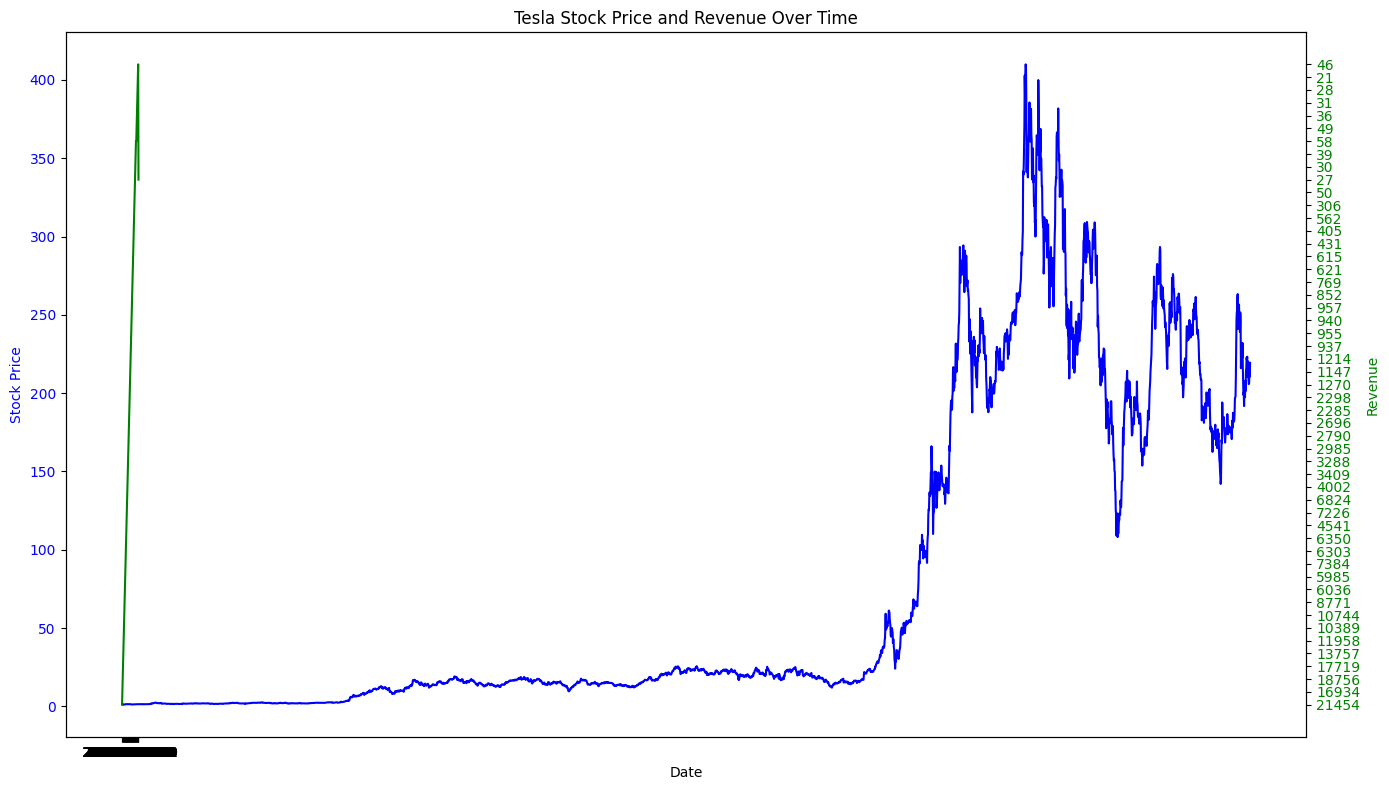

In [23]:
# Assuming the make_graph function is already defined
def make_graph(stock_data, revenue_data, company_name):
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plotting stock data
    ax1.plot(stock_data.index, stock_data['Close'], color='blue', label="Stock Price")
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plotting revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label="Revenue")
    ax2.set_ylabel('Revenue', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Adding title and showing the plot
    plt.title(f"{company_name} Stock Price and Revenue Over Time")
    fig.tight_layout()
    plt.show()

# Call the make_graph function for Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')


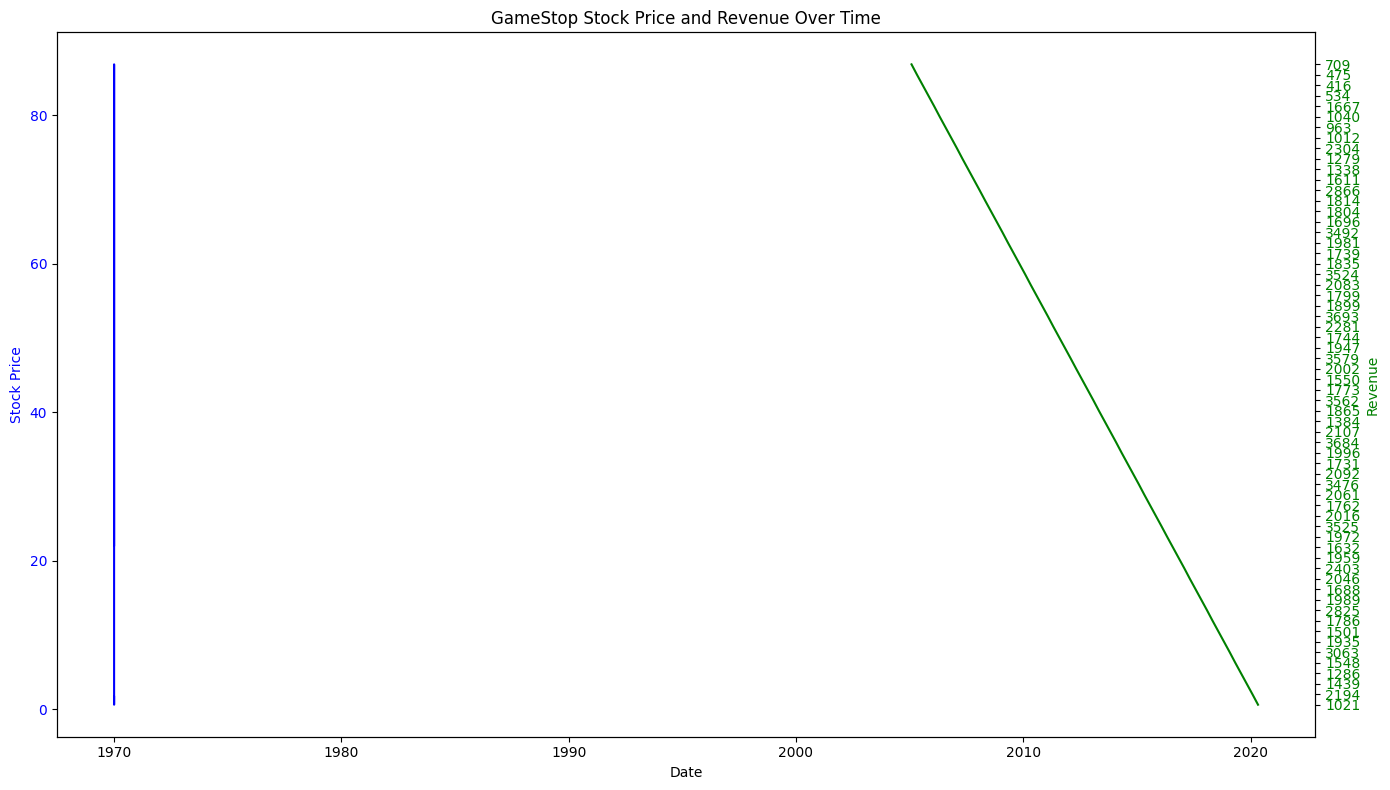

In [27]:
def make_graph(stock_data, revenue_data, company_name):
    import matplotlib.pyplot as plt
    import pandas as pd

    # Ensure the index of stock_data is in datetime format
    stock_data.index = pd.to_datetime(stock_data.index)

    # Ensure the 'Date' column in revenue_data is in datetime format
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plotting stock data (adjust to only show up to June 2021)
    ax1.plot(stock_data[stock_data.index <= '2021-06-30'].index,
             stock_data[stock_data.index <= '2021-06-30']['Close'],
             color='blue', label="Stock Price")
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plotting revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label="Revenue")
    ax2.set_ylabel('Revenue', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Adding title and showing the plot
    plt.title(f"{company_name} Stock Price and Revenue Over Time")
    fig.tight_layout()
    plt.show()

# Call the make_graph function for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')
